In [14]:
from api import consumer_secret,consumer_key,access_key,access_secret
import tweepy
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import time 
import pyplotas plt

analyzer = SentimentIntensityAnalyzer()

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit = 15*60)
#''', '@CBSNews', '@cnnbrk', '@FoxNews', '@nytimes' '''
users = ['@BBC']
cols = ['name','txt','compound','pos','neu','neg', 'timestamp']
recs = []


In [15]:
#include_rts = False
for u in users:
    for x in range(100):
        public_tweets = api.user_timeline(u ,page = x)
        name = public_tweets[0]["user"]['name']
        txt = public_tweets[0]["text"]
        ts = public_tweets[0]['created_at']
        timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(ts,'%a %b %d %H:%M:%S +0000 %Y'))
        compound = analyzer.polarity_scores(txt)["compound"]
        pos = analyzer.polarity_scores(txt)["pos"]
        neu = analyzer.polarity_scores(txt)["neu"]
        neg = analyzer.polarity_scores(txt)["neg"]
        tup = (name,txt,compound,pos,neu,neg,timestamp)
        recs.append(tup)

In [16]:
users = ['@CBSNews']
for u in users:
    for x in range(100):
        public_tweets = api.user_timeline(u ,page = x)
        name = public_tweets[0]["user"]['name']
        txt = public_tweets[0]["text"]
        ts = public_tweets[0]['created_at']
        timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(ts,'%a %b %d %H:%M:%S +0000 %Y'))
        compound = analyzer.polarity_scores(txt)["compound"]
        pos = analyzer.polarity_scores(txt)["pos"]
        neu = analyzer.polarity_scores(txt)["neu"]
        neg = analyzer.polarity_scores(txt)["neg"]
        tup = (name,txt,compound,pos,neu,neg,timestamp)
        recs.append(tup)

In [17]:
users = ['@cnnbrk']
for u in users:
    for x in range(100):
        public_tweets = api.user_timeline(u ,page = x)
        name = public_tweets[0]["user"]['name']
        txt = public_tweets[0]["text"]
        ts = public_tweets[0]['created_at']
        timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(ts,'%a %b %d %H:%M:%S +0000 %Y'))
        compound = analyzer.polarity_scores(txt)["compound"]
        pos = analyzer.polarity_scores(txt)["pos"]
        neu = analyzer.polarity_scores(txt)["neu"]
        neg = analyzer.polarity_scores(txt)["neg"]
        tup = (name,txt,compound,pos,neu,neg,timestamp)
        recs.append(tup)

In [18]:
users = ['@FoxNews']
for u in users:
    for x in range(100):
        public_tweets = api.user_timeline(u, page = x)
        name = public_tweets[0]["user"]['name']
        txt = public_tweets[0]["text"]
        compound = analyzer.polarity_scores(txt)["compound"]
        pos = analyzer.polarity_scores(txt)["pos"]
        neu = analyzer.polarity_scores(txt)["neu"]
        neg = analyzer.polarity_scores(txt)["neg"]
        tup = (name,txt,compound,pos,neu,neg)
        recs.append(tup)

In [19]:
users = ['@nytimes']
for u in users:
    for x in range(100):
        public_tweets = api.user_timeline(u ,page = x)
        name = public_tweets[0]["user"]['name']
        txt = public_tweets[0]["text"]
        ts = public_tweets[0]['created_at']
        timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(ts,'%a %b %d %H:%M:%S +0000 %Y'))
        compound = analyzer.polarity_scores(txt)["compound"]
        pos = analyzer.polarity_scores(txt)["pos"]
        neu = analyzer.polarity_scores(txt)["neu"]
        neg = analyzer.polarity_scores(txt)["neg"]
        tup = (name,txt,compound,pos,neu,neg,timestamp)
        recs.append(tup)

In [20]:
df = pd.DataFrame.from_records(recs, columns=cols)

In [21]:
print(df.head())


                   name                                                txt  \
0                   BBC  University Challenge icons @e_monkman and @Bob...   
1                   BBC  University Challenge icons @e_monkman and @Bob...   
2                   BBC  This is unbelievable! 👕📲️⚽️\n\nSam is 17 and s...   
3                   BBC  Commuters applying make-up is a major source o...   
4                   BBC  It's impossible to watch this without laughing...   
5                   BBC  🐻🍁This year's #Autumnwatch will take the team ...   
6                   BBC  RT @bbcthree: Lucy was 22 and studying to beco...   
7                   BBC  🎶🎤How well do you know your 90s boy bands and ...   
8                   BBC  ⛵️ This recycled plastic boat collects plastic...   
9                   BBC  RT @BBCOne: Stay cool. But. Tonight @missgemco...   
10                  BBC  Boeing says Asia needs 240,000 pilots over nex...   
11                  BBC  A documentary series following the sear

In [22]:
sortByTS = df.sort_values('timestamp')

In [24]:
print(sortByTS.head())

                  name                                                txt  \
299  CNN Breaking News  RT @CNNPolitics: Former Attorney General Loret...   
298  CNN Breaking News  A 56-year-old Minnesota grandmother is wanted ...   
297  CNN Breaking News  RT @CNNMoney: Martin Shkreli transferred to pr...   
296  CNN Breaking News  Fired FBI director James Comey sits down for a...   
295  CNN Breaking News  The CDC says not to eat romaine lettuce in any...   

     compound    pos    neu    neg            timestamp  
299    0.0000  0.000  1.000  0.000  2018-04-16 01:36:32  
298   -0.6908  0.000  0.783  0.217  2018-04-17 14:04:12  
297   -0.5106  0.000  0.769  0.231  2018-04-18 17:51:07  
296   -0.8176  0.000  0.727  0.273  2018-04-19 20:00:03  
295    0.3182  0.087  0.913  0.000  2018-04-20 22:09:55  


In [27]:
sortByTS.to_csv(path_or_buf = 'output/output.csv',sep = ',')

In [30]:
#sortByTS.plot.scatter('compound','timestamp')

In [33]:
cnn = df.loc[df['name'] == 'CNN Breaking News']
fox = df.loc[df['name'] == 'Fox News']
bbc = df.loc[df['name'] == 'BBC']
cbs = df.loc[df['name'] == 'CBS News']
nyt = df.loc[df['name'] == 'The New York Times']
cnnMean = cnn['compound'].mean()
foxMean = fox['compound'].mean()
bbcMean = bbc['compound'].mean()
cbsMean = cbs['compound'].mean()
nytMean = nyt['compound'].mean()
dctMeans = {'cnn':[cnnMean],'fox':[foxMean],'bbc':[bbcMean],'cbs':[cbsMean],'nyt':[nytMean]}
dfMeans = pd.DataFrame.from_dict(dctMeans)
print(dfMeans)

        cnn       fox      bbc       cbs       nyt
0 -0.199809 -0.037238  0.10612 -0.077739  0.045544


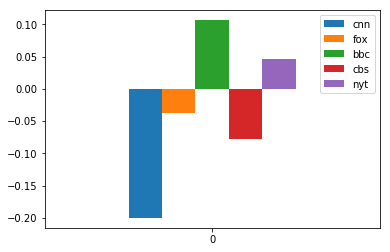

In [35]:
dfMeans.plot.bar(rot = 0)